In [ ]:
# Plotting notebook from our Interfereometry measurement experiments

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

In [97]:
T0 =  22.5 # Initial temperature we read on 2/3 (I = 0.)
L = 6 # In nanometers -- this is just a guess
L = L * (10**7)

I = np.arange(0,0.5,0.1)
x = np.arange(10)
y = np.random.random(10)


60000000


In [79]:
# Read in data from our CSV file - Thermal Expansion in Google Docs
path = '/Users/andrewbowen/physics/OpticsLab/interferometryMeasurements/data/'
data = pd.read_csv(path + 'Thermal-Expansion-Data.csv', sep = ',')

data

,I (A),T (C),T_err (+/-),Counts
0,0.0,22.5,0.1,0
1,0.1,24.3,0.1,6
2,0.2,29.5,0.1,133
3,0.3,37.7,0.1,289
4,0.4,48.2,0.1,403
5,0.5,60.3,0.1,610


In [81]:
# Setting up pandas series of each 
I = data['I (A)']
T = data['T (C)']
Terr = data['T_err (+/-)']
N = data['Counts']

In [82]:
def linModel(x,m,b):
    return m*x + b

def getDeltaL(n):
#     Function that takes in the # of counts and returns the path length (derivation was done in lab -check notebook)
#     factor of 8 refers to double length beam has to go: 2* deltaL = (lamba/4) * n 
    wavelength = 633 # in nanometers
    return (wavelength * n) / 8

# Getting deltaL values from our counts
deltaL = getDeltaL(N)

In [83]:
# Notice that curve_fit returns a tuple (of arrays)
fitCoeffs, fitCovariances = curve_fit(linModel, T, deltaL)

# Pick out the best-fit for the 'm' value and best-fit for the 'b' value
bestfit_m = fitCoeffs[0] # This slope is related to coeff of thermal expansion
bestfit_b = fitCoeffs[1]

# Printing best-fit values to screen, bestfit_m is slope of linear fit, b is y-intercept
print(f'best-fit value for \'m\': {bestfit_m}')
print(f'best-fit value for \'b\': {bestfit_b}')

best-fit value for 'm': 1279.7114995401482
best-fit value for 'b': -28452.780607947174


In [84]:
# Arrays for plotting line
bestfit_T = np.arange(0,65) # Temp can't go much above ~60 C
bestfit_L = linModel(bestfit_T, bestfit_m, bestfit_b) # Best-fit line for later, slope is coeff

array([-28452.78060795, -27173.06910841, -25893.35760887, -24613.64610933,
       -23333.93460979, -22054.22311025, -20774.51161071, -19494.80011117,
       -18215.08861163, -16935.37711209, -15655.66561255, -14375.95411301,
       -13096.24261347, -11816.53111393, -10536.81961439,  -9257.10811484,
        -7977.3966153 ,  -6697.68511576,  -5417.97361622,  -4138.26211668,
        -2858.55061714,  -1578.8391176 ,   -299.12761806,    980.58388148,
         2260.29538102,   3540.00688056,   4819.7183801 ,   6099.42987964,
         7379.14137918,   8658.85287872,   9938.56437826,  11218.2758778 ,
        12497.98737734,  13777.69887688,  15057.41037642,  16337.12187596,
        17616.8333755 ,  18896.54487504,  20176.25637458,  21455.96787412,
        22735.67937366,  24015.3908732 ,  25295.10237274,  26574.81387228,
        27854.52537182,  29134.23687136,  30413.9483709 ,  31693.65987044,
        32973.37136998,  34253.08286952,  35532.79436906,  36812.5058686 ,
        38092.21736814,  

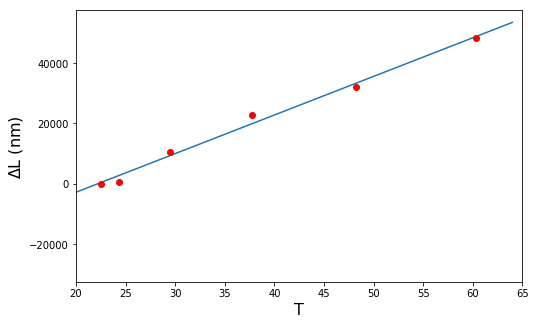

In [103]:
# Plot your data (again) as red circles with error bars
f,ax = plt.subplots(figsize=(8,5))
ax.errorbar(T, deltaL, xerr = Terr, fmt='ro',c = 'r')
ax.set_xlim([20,65])
ax.set_xlabel("T", fontsize = 16)
ax.set_ylabel("$\Delta$L (nm)", fontsize = 16)

# Define the y-values for the best-fit line, using the linModel function defined above
bestfit_y = linModel(bestfit_T, bestfit_m, bestfit_b)

# Overplot the best-fit line in blue (default color)
ax.plot(bestfit_T, bestfit_L)

In [99]:
# slope of best fit line (or its reciprocal) divided by length of rod gives alpha
alpha = bestfit_m / L
print(f'The coeffictient of thermal expansion alpha is {alpha} ')

The coeffictient of thermal expansion alpha is 2.1328524992335805e-05 


In [ ]:
# Our alpha is close to the alpha for Aluminum (~24e-6)